# ESCUELA POLITÉCNICA NACIONAL

## MÉTODOS NUMÉRICOS

### Correción del examen

David Alejandro Puga Novoa - GR1CC - 11/12/2024

#### Errores y aritmética de computador

##### 1. Suponga que dos puntos $(x_0, y_0)$ y $(x_1, y_1)$ se encuentran en línea recta con $(y_1 \neq y_0)$.  
Existen dos fórmulas para encontrar la intersección $x$ de la línea:  

- Método A:
$x = \frac{y_0 \cdot x_1 - x_0 \cdot y_1}{y_1 - y_0}$

- Método B:
$x = x_0 - \frac{(x_1 - x_0) \cdot y_0}{y_1 - y_0}$


Usando los datos $(x_0, y_0) = (1.31, 3.24)$ y $(x_1, y_1) = (1.93, 4.76)$, determine el valor real de la intersección $x$ (asumiendo redondeo a 6 cifras significativas):

Usando el Método A:
$x = \frac{3.24 \cdot 1.93 - 1.31 \cdot 4.76}{4.76 - 3.24}$

$x = \frac{6.2532 - 6.2356}{1.56}$

$x = \frac{0.0176}{1.56} = 0.0115789 = -1.15789 \cdot 10^{-2}$

Usando el Método B:
$x = 1.31 - \frac{(1.93 - 1.31) \cdot 3.24}{4.76 - 3.24}$

$x = 1.31 - \frac{0.62 \cdot 3.24}{1.56}$

$x = 1.31 - \frac{2.0088}{1.56}$

$x = 1.31 - 1.321578947 = -0.0115789 = -1.15789 \cdot 10^{-2}$


Usando aritmética de computador con redondeo a 3 cifras significativas:

Usando el Método A:
$x = \frac{3.24 \cdot 1.93 - 1.31 \cdot 4.76}{4.76 - 3.24}$

$x = \frac{6.25 - 6.22}{1.52} = -0.00658$

El error relativo (redondee al final del cálculo a 3 cifras significativas) del Método A:
$\text{error} = \frac{|0.0115789 - 0.00658|}{|0.0115789|} = 0.432$

Usando el Método B:
$x = 1.31 - \frac{(1.93 - 1.31) \cdot 3.24}{4.76 - 3.24} = -0.01$

El error relativo (redondee al final del cálculo a 3 cifras significativas) del Método B:
$\text{error} = \frac{|0.0115789 - 0.01|}{|0.0115789|} = 0.136$

¿Cuál método es mejor?

*El Método B*

##### 2. Los primeros tres términos diferentes a cero de la serie de Maclaurin para la función arcotangente son: $x - \frac{1}{3}x^3 + \frac{1}{5}x^5$

Calcule el error relativo en las siguientes aproximaciones de \(\pi\) mediante el polinomio (en lugar del arcotangente).  
Asuma que $π = 3.14159$.

- $4(\arctan(1/2) + \arctan(1/3))$

$\pi^* = 4\left(\left[\frac{1}{2} - \frac{1}{3}\left(\frac{1}{2}\right)^3 + \frac{1}{5}\left(\frac{1}{2}\right)^5\right] + \left[\frac{1}{3} - \frac{1}{3}\left(\frac{1}{3}\right)^3 + \frac{1}{5}\left(\frac{1}{3}\right)^5\right]\right)$

$\pi^* = 4\left(\left[\frac{223}{480}\right] + \left[\frac{391}{1215}\right]\right)$

$\pi^* = 4\left[\frac{6115}{7776}\right] = \frac{6115}{1944} = 3.1456$

Redondee a 4 cifras significativas únicamente en la respuesta final de sus cálculos.

$\text{ϵ} = \frac{|3.14159 - 3.1456|}{|3.14159|} = 0.0013$

¿En qué orden de magnitud está este error? Es decir, $ϵ<10^n,n=$ *3*

- $16 \cdot \arctan(1/5) - 4 \cdot \arctan(1/239)$

$\pi^* = 16\left[\frac{1}{5} - \frac{1}{3}\left(\frac{1}{5}\right)^3 + \frac{1}{5}\left(\frac{1}{5}\right)^5\right] - 4\left[\frac{1}{239} - \frac{1}{3}\left(\frac{1}{239}\right)^3 + \frac{1}{5}\left(\frac{1}{239}\right)^5\right]$

$\pi^* = 16\left[\frac{9253}{46875}\right] - 4\left[4.184076002 \cdot 10^{-3}\right]$

$\pi^* = 3.158357333 - 0.016736304 = 3.1416$

--

$\text{ϵ} = \frac{|3.14159 - 3.1416|}{|3.14159|} = 0.0000098$

¿En qué orden de magnitud está este error? Es decir, $ϵ<10^n,n=$ *5*

#### Solución de ecuaciones en 1 variable

##### 3. La función sin(x) tiene infinitas soluciones {...,−2π,−π,0,π,2π,...}.

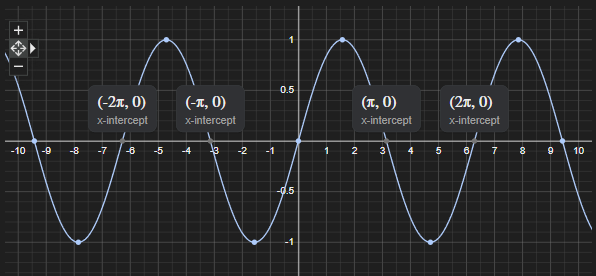

¿A cuál solución converge el método de la Bisección en los siguientes intervalos?

In [1]:
import math

def bisection_method(func, a, b, tolerance=1e-6, max_iterations=100):
    """
    Finds a root of the function func within the interval [a, b] using the bisection method.

    Args:
        func: The function whose root is to be found.
        a: The left endpoint of the interval.
        b: The right endpoint of the interval.
        tolerance: The desired accuracy.
        max_iterations: The maximum number of iterations.

    Returns:
        A tuple containing:
            - The approximate root.
            - A message indicating success or the reason for failure.
    """

    if func(a) * func(b) >= 0:
        return None, "No sign change in the given interval. Bisection method cannot be applied."

    for i in range(max_iterations):
        c = (a + b) / 2
        if func(c) == 0 or (b - a) / 2 < tolerance:
            return c, "Root found within tolerance"

        if func(c) * func(a) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2,  "Maximum iterations reached without achieving desired tolerance"


# Example usage for sin(x)
def f(x):
  return math.sin(x)

# Test intervals around known roots (0, pi, 2pi, etc.)
intervals = [(-2.5, -1), (-4, 5), (-3.5,3), (3, 5), (-1,2), (-5,4)]  # Example intervals; adjust for desired roots

for a, b in intervals:
    root, message = bisection_method(f, a, b)
    if root is not None:
        print(f"Interval: [{a}, {b}]")
        print(f"Approximate root: {root}")
        print(f"Message: {message}")
        print("-" * 20)
    else:
        print(f"Interval: [{a}, {b}]")
        print(message)
        print("-"*20)

Interval: [-2.5, -1]
No sign change in the given interval. Bisection method cannot be applied.
--------------------
Interval: [-4, 5]
Approximate root: 3.14159232378006
Message: Root found within tolerance
--------------------
Interval: [-3.5, 3]
No sign change in the given interval. Bisection method cannot be applied.
--------------------
Interval: [3, 5]
Approximate root: 3.1415929794311523
Message: Root found within tolerance
--------------------
Interval: [-1, 2]
Approximate root: -2.384185791015625e-07
Message: Root found within tolerance
--------------------
Interval: [-5, 4]
Approximate root: -3.14159232378006
Message: Root found within tolerance
--------------------


##### 4. El método de Newton para encontrar raíces se basa en la siguiente ecuación:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

Cuál es la raíz de la ecuación:

In [3]:
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newton-Raphson method for finding roots of a function.

    Parameters:
    - f: Objective function.
    - df: Derivative of the objective function.
    - x0: Initial value.
    - tol: Convergence tolerance.
    - max_iter: Maximum number of iterations.

    Returns:
    - Approximate root if it converges.
    - Number of iterations or an error message if it doesn't converge.
    """
    iter_count = 0
    x_curr = x0

    while iter_count < max_iter:
        f_x = f(x_curr)
        df_x = df(x_curr)
        
        if abs(df_x) < 1e-12:  # Avoid division by zero
            return "Error (division by zero)"

        x_next = x_curr - f_x / df_x
        
        if abs(x_next - x_curr) < tol:  # Check for convergence
            return x_next, iter_count + 1

        x_curr = x_next
        iter_count += 1

    return "Error (did not converge or oscillates)"

# Objective function and its derivative
def f(x):
    return x**3 + x - (1 + 3*x**2)

def df(x):
    return 3*x**2 + 1 - 6*x

# Initial values to test
initial_values = [3, 1, 0, 1 + (6**0.5)/3]

# Evaluation
for x0 in initial_values:
    result = newton_method(f, df, x0)
    print(f"x0 = {x0:.4f} -> Result: {result}")


x0 = 3.0000 -> Result: (2.7692923542387, 4)
x0 = 1.0000 -> Result: Error (did not converge or oscillates)
x0 = 0.0000 -> Result: Error (did not converge or oscillates)
x0 = 1.8165 -> Result: Error (division by zero)


##### 5. El método de la Secante se basa en la siguiente fórmula: 

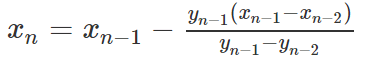

En base a esta fórmula, se ha generado el siguiente código. 

def secant_method(f, x0, x1, tol=1e-6, max_iter=100):    
    x_prev = x0
    x_curr = x1
    iter_count = 0

    while abs(f(x_curr)) > tol and iter_count < max_iter:
        # Calculate the next approximation using the secant method formula
        x_next = x_curr - f(x_curr) * (x_curr - x_prev) / (f(x_curr) - f(x_prev))

        # Update variables for the next iteration
        x_prev = x_curr
        x_curr = x_next
        iter_count += 1

    return x_curr, iter_count

El código funciona correctamente. Sin embargo, al depurarlo y profundizar en su ejecución, usted ha notado que el código realiza llamadas repetitivas e innecesarias. 
Esto se evidencia en la siguiente Figura:

La variable i representa el número de invocaciones a la función. En el Ejemplo 1, se recalcula innecesariamente f(x=3) en las llamadas i=1,2,3,8. Lo mismo sucede en i=5,6,7,12 para f(x=2.6). Esto ocasiona que se realicen 25 llamadas a la función en el Ejemplo 1. 

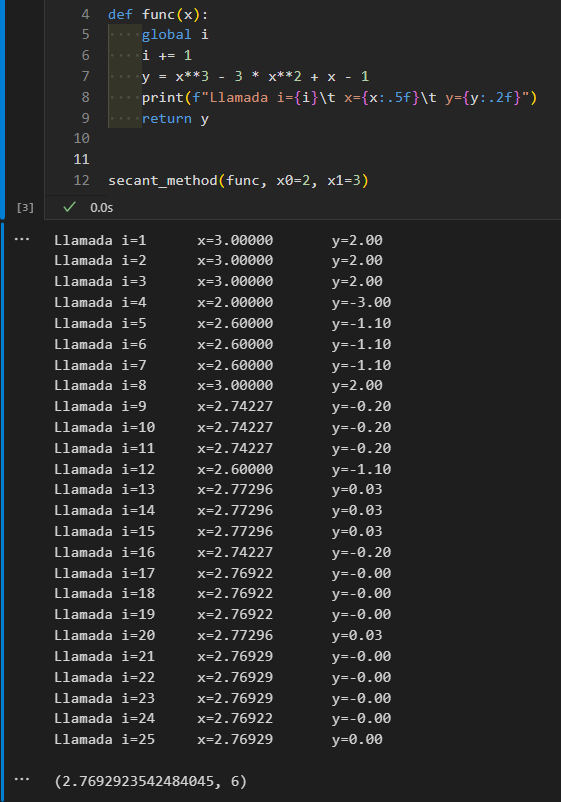

Modifique el código provisto para optimizar el número de llamadas a la función. 

In [4]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    x_prev = x0
    x_curr = x1
    f_prev = f(x_prev)  # Pre-calculate f(x_prev)
    f_curr = f(x_curr)  # Pre-calculate f(x_curr)
    iter_count = 0
    while abs(f_curr) > tol and iter_count < max_iter:
        # Calculate the next approximation using the secant method formula
        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)

        # Update variables for the next iteration
        x_prev = x_curr
        f_prev = f_curr # Update the pre-calculated values
        x_curr = x_next
        f_curr = f(x_curr) # Calculate f(x_curr) only once per iteration.
        iter_count += 1
    return x_curr, iter_count

Luego de optimizar el código y utilizando \(x_0=2, x_1=3 \), conteste:
¿Cuál es el número mínimo de llamadas a la función para llegar a la raíz en el Ejemplo 1?

In [6]:
i = 0

def func(x):
    global i
    i += 1
    y = x**3 - 3 * x**2 + x - 1
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y

secant_method(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=-3.00
Llamada i=2	 x=3.00000	 y=2.00
Llamada i=3	 x=2.60000	 y=-1.10
Llamada i=4	 x=2.74227	 y=-0.20
Llamada i=5	 x=2.77296	 y=0.03
Llamada i=6	 x=2.76922	 y=-0.00
Llamada i=7	 x=2.76929	 y=-0.00
Llamada i=8	 x=2.76929	 y=0.00


(2.7692923542484045, 6)

¿Cuál es el número mínimo de llamadas a la función para llegar a la raíz en el Ejemplo 2?

In [7]:
i = 0
import math

def func(x):
    global i
    i += 1
    y = math.sin(x) + 0.5
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y

secant_method(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=1.41
Llamada i=2	 x=3.00000	 y=0.64
Llamada i=3	 x=3.83460	 y=-0.14
Llamada i=4	 x=3.68602	 y=-0.02
Llamada i=5	 x=3.66399	 y=0.00
Llamada i=6	 x=3.66520	 y=-0.00
Llamada i=7	 x=3.66519	 y=-0.00


(3.66519143172732, 5)

#### Interpolación

##### 6. Dados los puntos $(−1,1),(0,5),(1,3)$, se ha obtenido los splines cúbicos correspondientes. 

Sin embargo, al observar la figura, usted no se siente satisfecho con la pendiente resultante en el punto $(x1,y1)$. Y decide intentar una modificación a las ecuaciones, tal que los splines sean tangentes a una pendiente deseada $m$ en el punto $(x1,y1)$.

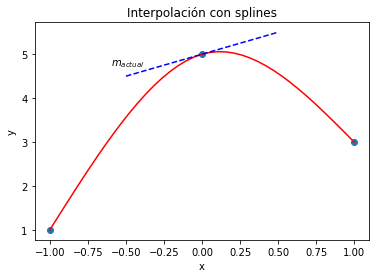

Recuerde que la expresión de un spline cúbico es la siguiente:

$Si(x)=a_i+b_i(x−x_i)+ci(x−x_i)^2+di(x−x_i)^3$

¿En caso de ser posible, y bajo qué condiciones se puede encontrar los splines cúbicos que cumplan con la condición de $m$?

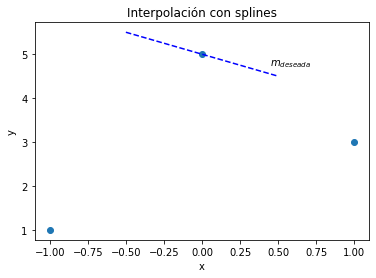

Determine la ecuación que se debe modificar para poder cumplir con el requisito de $m$.

1. Modificación de los Splines para Cumplir con la Pendiente Deseada $m$ en el Punto $(x_1, y_1)$:

Para cumplir con el requisito de la pendiente $m$ en $x_1$, podemos modificar la condición de tangencia:

$S'_1(x_1) = m$

Esto significa que debemos ajustar los coeficientes $b_0$ y  $b_1$ de los splines para que se cumpla la condición de la derivada en el punto $x_1$.

2. Condiciones Necesarias para la Existencia de una Solución:

Al trabajar con splines cúbicos, las condiciones para una solución única son las siguientes:

- **Condiciones de continuidad en las derivadas**:
  - $S_1(x_1) = y_1$
  - $S'_0(x_1) = S'_1(x_1)$ (continuidad de la primera derivada en $x_1$)
  - $S''_0(x_0) = 0$ (condición de frontera en $x_0$)
  - $S''_1(x_2) = 0$ (condición de frontera en $x_2$)

Si deseamos que la pendiente en $x_1$ sea  $m$, necesitamos modificar el sistema de ecuaciones para garantizar que $S'_1(x_1) = m$. Por lo tanto, la ecuación que debe modificarse es la de la **continuidad de la primera derivada** en $x_1$:

$S'_0(x_1) = S'_1(x_1)$

3. Ecuaciones del Spline:

Dado los puntos $(-1, 1), (0, 5), (1, 3)$, tenemos que encontrar los splines correspondientes.

- Para $S_0(x)$:

La forma general de $S_0(x)$ es:

$S_0(x) = a_0 + b_0(x - x_0) + c_0(x - x_0)^2 + d_0(x - x_0)^3$

Sustituyendo $x_0 = -1$, $y_0 = 1$ y utilizando $m = -3$ (suponiendo del gráfico), obtenemos los coeficientes de $S_0(x)$.

- Para $S_1(x)$:

La forma general de $S_1(x)$ es:

$S_1(x) = a_1 + b_1(x - x_1) + c_1(x - x_1)^2 + d_1(x - x_1)^3$

Donde $x_1 = 0$, $y_1 = 5$, y la pendiente deseada $m = -3$.

4. Solución:

- **Spline $S_0(x)$**:

$S_0(x) = -3(x + 1)^2 + 7(x + 1) + 1$

- **Spline $S_1(x)$**:

$S_1(x) = -3x^2 + x + 5$

Para lograr la condición de pendiente deseada $m$ en el punto $x_1$, es necesario modificar la continuidad de la primera derivada en el punto de unión $x_1$ y aplicar las condiciones correspondientes a los splines cúbicos. Las ecuaciones resultantes de los splines son:

- **Spline $S_0(x)$**:
  
  $S_0(x) = -3(x + 1)^2 + 7(x + 1) + 1$

- **Spline $S_1(x)$**:
  
  $S_1(x) = -3x^2 + x + 5$

##### 7. Dados los puntos $(−1,1)$,$(1,3)$. Determine el spline cúbico teniendo en cuenta que $f′(x_0)=1$,$f′(x_n)=2$.

- 1. Condiciones Iniciales
Para $S_0(x)$ que pase por $(-1, 1)$ y $(1, 3)$:

**Paso por el primer punto $(-1, 1)$**

   $S_0(-1) = 1$
   
   Sustituyendo en la ecuación del spline:
   
   $a(0)^3 + b(0)^2 + c(0) + d = 1 \implies d = 1$

**Paso por el segundo punto $(1, 3)$:**

   $S_0(1) = 3$
   
   Sustituyendo:
   
   $a(2)^3 + b(2)^2 + c(2) + d = 3$
   
   Como $d = 1$:
   
   $8a + 4b + 2c + 1 = 3 \implies 8a + 4b + 2c = 2 \tag{1}$

- 2. Derivadas en los extremos
**En el punto inicial ($x = -1$):**

   $S_0'(-1) = 1$
  
   Derivando el spline:
  
   $S_0'(x) = 3a(x - x_0)^2 + 2b(x - x_0) + c$
  
   Evaluando en $x = -1$:
  
   $S_0'(-1) = 3a(0)^2 + 2b(0) + c = 1 \implies c = 1$

**En el punto final ($x = 1$):**

   $S_0'(1) = 2$
   
   Evaluando:
   
   $ S_0'(1) = 3a(2)^2 + 2b(2) + c$
   
   Como $c = 1$:
   
   $12a + 4b + 1 = 2 \implies 12a + 4b = 1 \tag{2}$

- 3. Resolviendo el sistema de ecuaciones
De las ecuaciones $(1)$ y $(2)$:

- $8a + 4b + 2 = 2 \implies 8a + 4b = 0 \tag{3}$
- $12a + 4b = 1 \tag{4}$

Restamos $(4) - (3)$:

$(12a + 4b) - (8a + 4b) = 1 - 0$

$4a = 1 \implies a = \frac{1}{4}$

Sustituimos $a = \frac{1}{4}$ en $(3)$:

$8\left(\frac{1}{4}\right) + 4b = 0 \implies 2 + 4b = 0 \implies b = -\frac{1}{2}$

- 4. Ecuación final del spline cúbico
Sustituyendo los coeficientes $a, b, c, d$:

$a = \frac{1}{4}, \quad b = -\frac{1}{2}, \quad c = 1, \quad d = 1$

El spline cúbico es:

$S_0(x) = \frac{1}{4}(x + 1)^3 - \frac{1}{2}(x + 1)^2 + 1(x + 1) + 1$



##### 8. La interpolación de un conjunto de puntos usando polinomios de Lagrange $P(x)$ está dada por la fórmula: 

$P(x) = \sum_{k=0}^{n} f(x_k) L_k(x)$

Donde:

$L_k(x) = \prod_{\substack{i=0 \\ i \neq k}}^{n} \frac{x - x_i}{x_k - x_i}$

Dados los puntos $(0,0),(1,1),(2,2),(3,3)$, 

Los polinomios $ L_k(x) $ se calculan de la siguiente manera:

1. Para $ k = 0 $:
   
   $L_0(x) = \frac{(x - 1)(x - 2)(x - 3)}{(0 - 1)(0 - 2)(0 - 3)} = \frac{(x - 1)(x - 2)(x - 3)}{-6}$
   
   Simplificando:
   
   $L_0(x) = \frac{-(x - 1)(x - 2)(x - 3)}{6}$

3. Para \( k = 1 \):

   $L_1(x) = \frac{(x - 0)(x - 2)(x - 3)}{(1 - 0)(1 - 2)(1 - 3)} = \frac{x(x - 2)(x - 3)}{2}$
   
   Simplificando:
   
   $L_1(x) = \frac{x(x - 2)(x - 3)}{2}$

5. Para  k = 2 :

   $L_2(x) = \frac{(x - 0)(x - 1)(x - 3)}{(2 - 0)(2 - 1)(2 - 3)} = \frac{x(x - 1)(x - 3)}{2}$
   
   Simplificando:
   
   $L_2(x) = \frac{x(x - 1)(x - 3)}{2}$

7. Para  k = 3 :

   $L_3(x) = \frac{(x - 0)(x - 1)(x - 2)}{(3 - 0)(3 - 1)(3 - 2)} = \frac{x(x - 1)(x - 2)}{6}$
   
   Simplificando:
   
   $L_3(x) = \frac{x(x - 1)(x - 2)}{6}$

Construcción del Polinomio de Lagrange \( P(x) \)

El polinomio de interpolación de Lagrange es:

$
P(x) = f(x_0) L_0(x) + f(x_1) L_1(x) + f(x_2) L_2(x) + f(x_3) L_3(x)
$

Sustituyendo los valores \( f(x_k) \) en la fórmula:

$
P(x) = 0 \cdot L_0(x) + 1 \cdot L_1(x) + 2 \cdot L_2(x) + 3 \cdot L_3(x)
$

$
P(x) = L_1(x) + 2L_2(x) + 3L_3(x)
$
Sustituyendo las expresiones de \( L_1(x) \), \( L_2(x) \), y \( L_3(x) \):

$
P(x) = \frac{x(x - 2)(x - 3)}{2} + 2 \cdot \frac{x(x - 1)(x - 3)}{2} + 3 \cdot \frac{x(x - 1)(x - 2)}{6}
$

Simplificando:

$
P(x) = \frac{x(x - 2)(x - 3)}{2} + \frac{2x(x - 1)(x - 3)}{2} + \frac{3x(x - 1)(x - 2)}{6}
$

Multiplicando por 6 para eliminar denominadores:

$
P(x) = \frac{3x(x - 2)(x - 3)}{6} + 6x(x - 1)(x - 3) + x(x - 1)(x - 2)
$

Finalmente, combinamos y simplificamos los términos para obtener el polinomio completo.

- Evaluando P(3.78) :

Sustituimos x = 3.78  en el polinomio P(x) :

$P(3.78) = \frac{3(3.78)(3.78 - 2)(3.78 - 3)}{6} + 6(3.78)(3.78 - 1)(3.78 - 3) + (3.78)(3.78 - 1)(3.78 - 2)$

- Evaluando  P(19.102) :

Sustituimos x = 19.102  en el polinomio  P(x) :

$P(19.102) = \frac{3(19.102)(19.102 - 2)(19.102 - 3)}{6} + 6(19.102)(19.102 - 1)(19.102 - 3) + (19.102)(19.102 - 1)(19.102 - 2)$